In [1]:
#Introduction to SOM on-line training algorithm and its implementation using python numpy
#clustering sample data using python library pandas, matplotlib, numpy, 
#and SOM algorithm implementation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

In [16]:
#reading data as data frame
#data format must be .csv
input_data = pd.read_csv("E:/zoo.csv")
#visualize some data
input_data.iloc[:, :] 
#read with 'n' data based on import file
#data form official site, there are 101 name of animals

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
#we take all columns of characteristic and save name_animal and class_type
#there are 16 characteristic (16 columns) of animal and one column number total is 17
#for n data based file
trunc_data = input_data.iloc[:, 1:17]
trunc_data.iloc[:, :]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0


In [4]:
#this step for change weight become 0 and 1 all to prevent large numbers influencing the weights.
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:, :]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.500,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.000,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.500,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,1.0,1.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000,1.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.000,1.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,0.0,1.0,0.0


In [6]:
#train the data 7x1 SOM with 16 features with initialize function first
#7 is sum of classes we will make based max number of class_type at the data
#we must to import SOM Library first in our interpreter folder/lib/sitepackages
from com.machinelearningnepal.som.online_som import SOM
# som = SOM(x_size, y_size, num_features)
anim_som = SOM(7,1,16)

Initial weights:  [[[0.16025095 0.680944   0.92011868 0.78613414 0.5988137  0.12759901
   0.02123785 0.72152887 0.94305012 0.11466577 0.9468524  0.65018776
   0.78083692 0.01173857 0.5075161  0.95500391]]

 [[0.08361982 0.94354791 0.92263491 0.91673328 0.64215186 0.81171075
   0.78035526 0.82021939 0.20004498 0.00567201 0.44302495 0.51607872
   0.01843718 0.15173495 0.74525295 0.42433041]]

 [[0.99843453 0.01067606 0.49964935 0.97215094 0.37118161 0.52420918
   0.18533741 0.54093649 0.80248913 0.32974987 0.94508593 0.71998149
   0.97332635 0.14281185 0.05826822 0.31777466]]

 [[0.87888287 0.47768947 0.88540202 0.32070582 0.55176667 0.52929888
   0.32057654 0.08409885 0.57506492 0.82546604 0.54019336 0.2251442
   0.25667951 0.92858999 0.42825214 0.58492662]]

 [[0.18464519 0.69451531 0.25805348 0.56377156 0.94632478 0.24059275
   0.84387928 0.20585597 0.93279266 0.00651441 0.99940087 0.93291349
   0.43172291 0.44710252 0.50451635 0.73754184]]

 [[0.47244121 0.80006353 0.08947565 0.10206

In [17]:
#train the data call the data values
#implemented using numpy, the values of the dataframe should be sent
#initialize number of epoch is 200
#initialize number of learning rate is 0.1
anim_som.train(trunc_data.values,
          num_epochs=200,
          init_learning_rate=0.1
          )

SOM training epoches 20
neighborhood radius  1.0
learning rate  0.09048374180359596
weights:  [[[7.02602395e-02 9.39537593e-50 8.74066537e-01 9.88042179e-02
   8.26217697e-50 8.70889842e-01 7.92243647e-01 7.95160516e-01
   8.15027307e-01 3.61798839e-01 2.08175580e-01 4.85169860e-01
   2.05060759e-01 6.78625215e-01 7.26847774e-03 3.33941844e-01]]

 [[4.36573637e-01 7.42495926e-65 5.20485990e-01 4.74343946e-01
   4.25258878e-64 5.52470417e-01 7.77184775e-01 8.79469014e-01
   9.05173605e-01 6.72627720e-01 1.32305436e-01 3.31258631e-01
   2.82223782e-01 7.95800015e-01 5.34857070e-02 5.72147695e-01]]

 [[9.12808077e-01 8.63508942e-62 7.79549026e-02 9.40565658e-01
   4.90841859e-02 1.37700680e-01 6.06816272e-01 9.81479439e-01
   1.00000000e+00 1.00000000e+00 1.74988799e-02 1.00565141e-01
   4.01669549e-01 9.34014047e-01 1.52737573e-01 7.41479590e-01]]

 [[8.20472542e-01 3.00000695e-51 2.41738579e-01 7.27194138e-01
   1.81692497e-01 1.51276081e-02 3.18453846e-01 7.27194138e-01
   7.27194138e-

SOM training epoches 120
neighborhood radius  1.0
learning rate  0.05488116360940265
weights:  [[[7.15666031e-002 1.08461070e-143 8.71257882e-001 1.06098256e-001
   9.53793189e-144 8.90363211e-001 8.07833421e-001 7.84021506e-001
   8.05672764e-001 3.49713293e-001 1.93355136e-001 4.96111349e-001
   2.10464299e-001 6.75282893e-001 1.45501405e-002 3.13749902e-001]]

 [[4.75298208e-001 3.11343142e-190 4.83314348e-001 5.18223129e-001
   1.78319410e-189 5.34690756e-001 7.58498216e-001 8.79619513e-001
   9.07222746e-001 6.87969991e-001 1.17843599e-001 3.16892762e-001
   2.99508665e-001 7.94532318e-001 8.73549144e-002 5.93033136e-001]]

 [[9.20181051e-001 2.19768616e-181 6.91224203e-002 9.49902172e-001
   4.12084085e-002 1.30347590e-001 5.93108745e-001 9.80975408e-001
   1.00000000e+000 1.00000000e+000 1.83877101e-002 8.79745459e-002
   4.13227854e-001 9.15022200e-001 1.81495106e-001 7.62894634e-001]]

 [[8.38531066e-001 2.16522478e-151 2.23616437e-001 7.48578213e-001
   1.76183939e-001 1.8476

In [18]:
#Prediction means finding the Best Matching Unit weight
#have relation with values RGB Colour and index
def predict(df):
    bmu, bmu_idx = anim_som.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df
clustered_df = trunc_data.apply(predict, axis=1)
clustered_df.iloc[:]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,bmu,bmu_idx
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.500,0.0,0.0,1.0,"[[0.9421711159720301, 4.608120649226463e-242, ...","[2, 0]"
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0,"[[0.9421711159720301, 4.608120649226463e-242, ...","[2, 0]"
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.000,1.0,0.0,0.0,"[[0.06939659458250634, 1.8819625838473962e-191...","[0, 0]"
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.500,0.0,0.0,1.0,"[[0.9421711159720301, 4.608120649226463e-242, ...","[2, 0]"
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0,"[[0.9421711159720301, 4.608120649226463e-242, ...","[2, 0]"
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0,"[[0.9421711159720301, 4.608120649226463e-242, ...","[2, 0]"
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,1.0,1.0,1.0,"[[0.9421711159720301, 4.608120649226463e-242, ...","[2, 0]"
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000,1.0,1.0,0.0,"[[0.06939659458250634, 1.8819625838473962e-191...","[0, 0]"
8,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.000,1.0,0.0,0.0,"[[0.06939659458250634, 1.8819625838473962e-191...","[0, 0]"
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.500,0.0,1.0,0.0,"[[0.8328247791191407, 1.3412202212569322e-202,...","[3, 0]"


In [10]:
#we give back name of animal
joined_df = input_data.join(clustered_df, rsuffix="_norm")
joined_df[:]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,backbone_norm,breathes_norm,venomous_norm,fins_norm,legs_norm,tail_norm,domestic_norm,catsize_norm,bmu,bmu_idx
0,aardvark,1,0,0,1,0,0,1,1,1,...,1.0,1.0,0.0,0.0,0.500,0.0,0.0,1.0,"[[0.949292795497052, 1.4101489354584974e-31, 0...","[2, 0]"
1,antelope,1,0,0,1,0,0,0,1,1,...,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0,"[[0.949292795497052, 1.4101489354584974e-31, 0...","[2, 0]"
2,bass,0,0,1,0,0,1,1,1,1,...,1.0,0.0,0.0,1.0,0.000,1.0,0.0,0.0,"[[0.060526634958243404, 1.085903664024562e-25,...","[0, 0]"
3,bear,1,0,0,1,0,0,1,1,1,...,1.0,1.0,0.0,0.0,0.500,0.0,0.0,1.0,"[[0.949292795497052, 1.4101489354584974e-31, 0...","[2, 0]"
4,boar,1,0,0,1,0,0,1,1,1,...,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0,"[[0.949292795497052, 1.4101489354584974e-31, 0...","[2, 0]"
5,buffalo,1,0,0,1,0,0,0,1,1,...,1.0,1.0,0.0,0.0,0.500,1.0,0.0,1.0,"[[0.949292795497052, 1.4101489354584974e-31, 0...","[2, 0]"
6,calf,1,0,0,1,0,0,0,1,1,...,1.0,1.0,0.0,0.0,0.500,1.0,1.0,1.0,"[[0.949292795497052, 1.4101489354584974e-31, 0...","[2, 0]"
7,carp,0,0,1,0,0,1,0,1,1,...,1.0,0.0,0.0,1.0,0.000,1.0,1.0,0.0,"[[0.060526634958243404, 1.085903664024562e-25,...","[0, 0]"
8,catfish,0,0,1,0,0,1,1,1,1,...,1.0,0.0,0.0,1.0,0.000,1.0,0.0,0.0,"[[0.060526634958243404, 1.085903664024562e-25,...","[0, 0]"
9,cavy,1,0,0,1,0,0,0,1,1,...,1.0,1.0,0.0,0.0,0.500,0.0,1.0,0.0,"[[0.8637706041280979, 2.88517788604501e-25, 0....","[3, 0]"


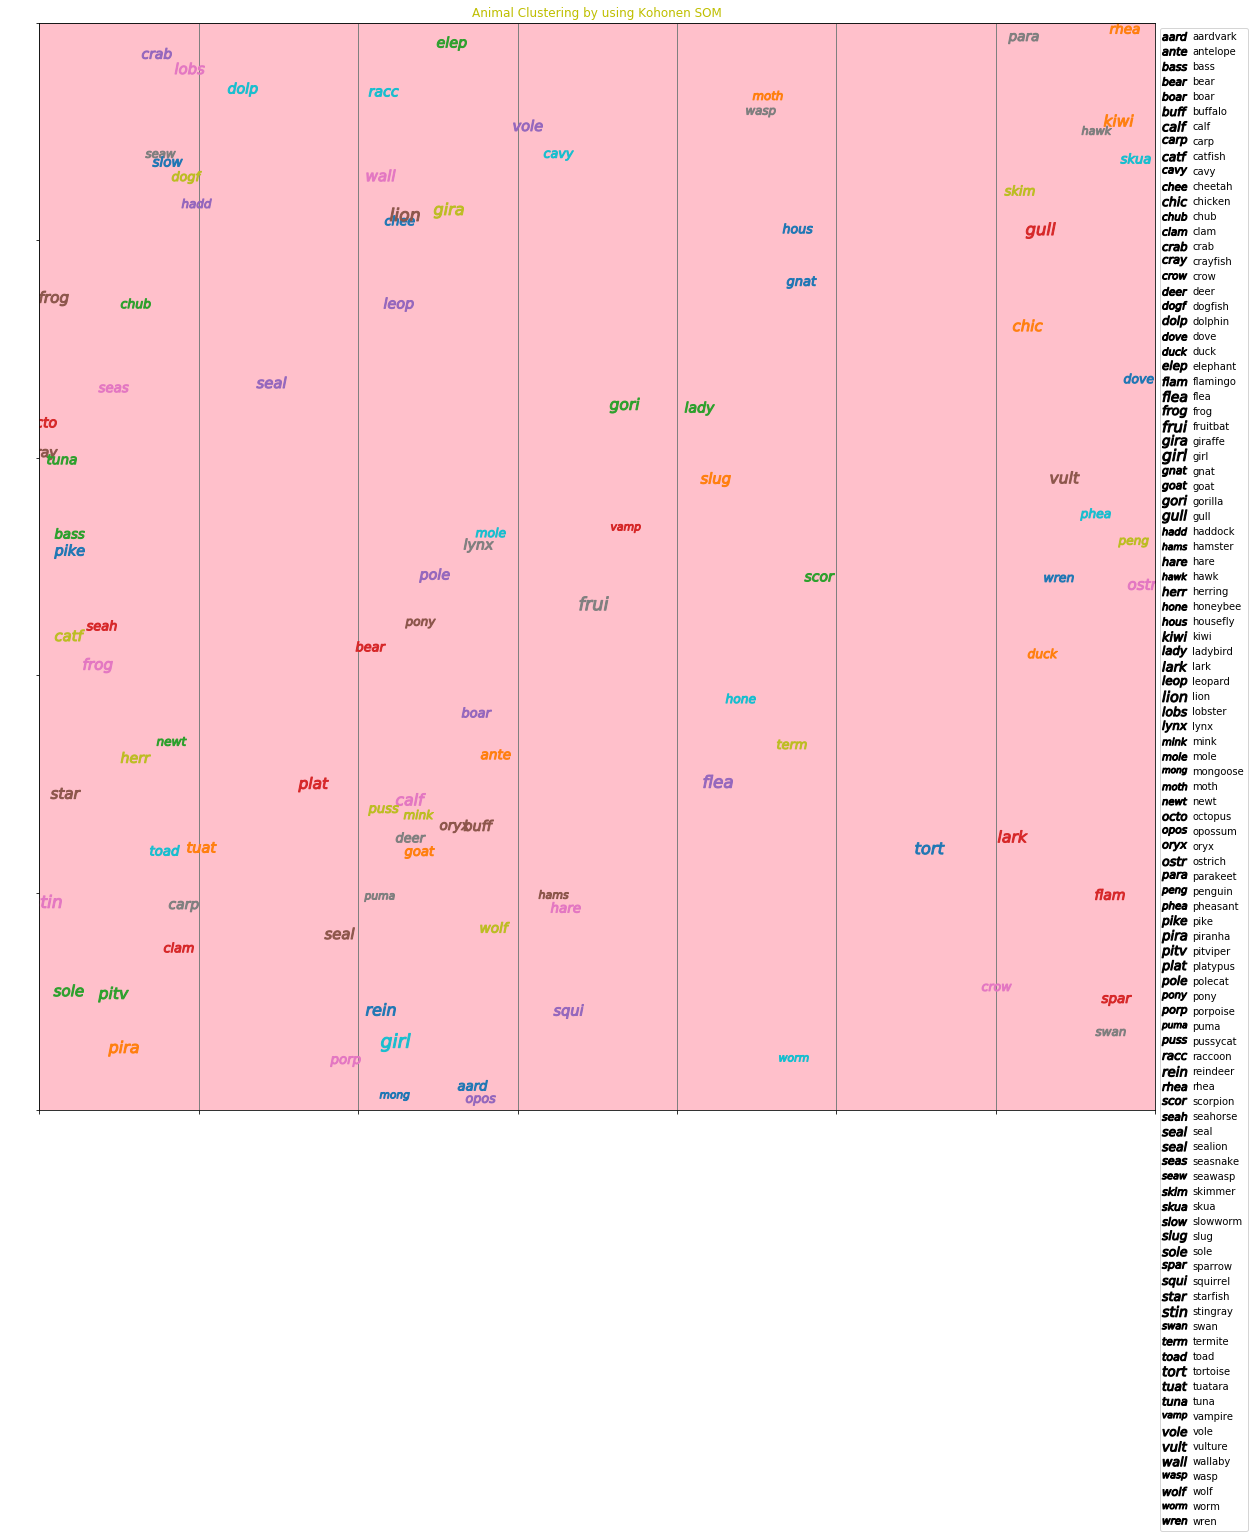

In [23]:
import matplotlib.lines as mlines
from matplotlib import patches as patches
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,20))
# setup axes
ax = fig.add_subplot(111)
scale = 1000
ax.set_xlim((0, anim_som.net.shape[0]*scale))
ax.set_ylim((0, anim_som.net.shape[1]*scale))
ax.tick_params(labelcolor='w')
ax.set_title("Animal Clustering by using Kohonen SOM", color = 'y')

for x in range(0, anim_som.net.shape[0]):
    for y in range(0, anim_som.net.shape[1]):
        ax.add_patch(patches.Rectangle((x*scale, y*scale), scale, scale,
                     facecolor='pink',
                     edgecolor='grey'))
legend_map = {}
        
for index, row in joined_df.iterrows():
    x_cor = row['bmu_idx'][0] * scale
    y_cor = row['bmu_idx'][1] * scale
    x_cor = np.random.randint(x_cor, x_cor + scale)
    y_cor = np.random.randint(y_cor, y_cor + scale)
    marker = "$\\ " + row['animal_name'][0:4]+"$"
    marker = marker.lower()
    ax.plot(x_cor, y_cor, color=None, marker=marker, markersize=30)
    label = row['animal_name']
    if not label in legend_map:
        legend_map[label] =  mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                          markersize=25, label=label)
plt.legend(handles=list(legend_map.values()), bbox_to_anchor=(1, 1))
plt.show()